# Calorimeter Clusters Collection

A jet is built from these clusters. Lets take a dive into the raw versions.

In [1]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21
import matplotlib.pyplot as plt
from config import rucio_zee_r21_mc, xAODLocalTyped, local_xaod_path

In [2]:
# ds = SXDSAtlasxAODR21(rucio_zee_r21_mc, backend='dev_xaod')
ds = xAODLocalTyped(local_xaod_path)

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


There are several `CaloCluster` collections. For this we'll go after `egammaClusters`.

_TODO_: Why doesn't this work for `CaloCalTopoClusters`, which are in the dataset for this according to `checkxAOD.py`. Fails with a "no metadata for branch" error.

In [3]:
jets = (ds
          .SelectMany(lambda e: e.CaloClusters('egammaClusters'))
          .Select(lambda cluster: cluster.pt() / 1000.0)
          .AsAwkwardArray('ClusterPt')
          .value())

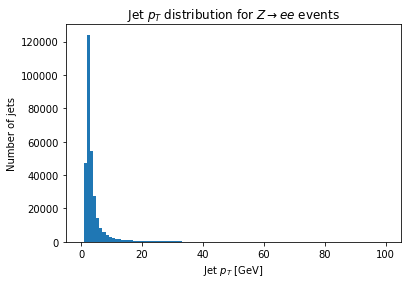

In [4]:
plt.hist(jets.ClusterPt, bins=100, range=(0, 100))
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')
_ = plt.title('Jet $p_T$ distribution for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [5]:
from func_adl_servicex_xaodr21.xAOD.calocluster_v1 import CaloCluster_v1
help(CaloCluster_v1)

Help on class CaloCluster_v1 in module func_adl_servicex_xaodr21.xAOD.calocluster_v1:

class CaloCluster_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  CaloCluster_v1(self) -> 'func_adl_servicex_xaodr21.xAOD.calocluster_v1.CaloCluster_v1'
 |      A method
 |  
 |  badChannelList(self) -> 'func_adl_servicex_xaodr21.vector_xaod_caloclusterbadchanneldata_v1_.vector_xAOD_CaloClusterBadChannelData_v1_'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  e(self) -> 'float'
 |      A method
 |  
 |  energyBE(self, layer: 'int') -> 'float'
 |      A method
 |  
 |  et(self) -> 'float'
 |      A method
 |  
 |  eta(self) -> 'float'
 |      A method
 |  
 |  etaBE(self, layer: 'int') -> 'float'
 |      A method
 |  
 |  getClusterEtaSize(self) -> 'int'
 |      A method
 |  
 |  getClusterPhiSize(self) -> 'int'
 |      A method
 |  
 |  getSisterCluster(self) -> 'func_adl_servicex_xaodr21.xAOD.calocluster_v1.CaloCluster_v1'
 |      A metho

## Further Information

* The [`xAOD::CaloCluster_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODCaloEvent/xAODCaloEvent/versions/CaloCluster_v1.h) with all the inline documentation.